In [364]:
# Imports
print ("importing........", flush=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# sns.set_theme(style="ticks", color_codes=True)
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression # LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score # k-fold cross-validation.... 
# pair 2
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
# pair 4
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, classification_report, make_scorer #......
from sklearn.metrics import confusion_matrix
# pair 5
# from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost
from xgboost import plot_importance
from matplotlib.colors import ListedColormap
plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
# Pallets used for visualizations
color= "Spectral"
color_sns= sns.color_palette(color)
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.preprocessing import OneHotEncoder
# from scipy.special import boxcox, inv_boxcox
print("[Done]")

importing........
[Done]


In [365]:
# Helper Functions
def model_eval(mdl_local, X_local, y_local, bta = 1):
    y_pred = mdl_local.predict(X_local)
    print(f"F({bta}):", fbeta_score(y_local, y_pred, beta= bta))
    print("Precision :", precision_score(y_local, y_pred))
    print("Recall :", recall_score(y_local, y_pred))
    print("F1 score :", f1_score(y_local, y_pred))
         

def make_confusion_matrix(mdl_local, X_local, y_local, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (mdl_local.predict_proba(X_local)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_local, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Leave_job', 'target'],
           yticklabels=['Leave_job', 'target']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    
def make_class_report(mdl_local, X_local, y_local, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (mdl_local.predict_proba(X_local)[:, 1] >= threshold)
    print(classification_report(y_local, y_predict))
    
       
def model_metrics(model, kfold, X_train, X_test, y_train, y_test, df_train):
    
    model.fit(X_train, y_train)

    #metrics
    results = cross_val_score(model, X_train, y_train, cv = kfold)
    print("CV scores: ", results); print("CV Standard Deviation: ", results.std()); print();
    print('CV Mean score: ', results.mean()); 
    print('Train score:   ', model.score(X_train, y_train))
    print('Test score:    ', model.score(X_test, y_test))
    
    pred = model.predict(X_test)
    # CODE HERE PLEASE
    print()
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, pred))
    print('Classification Report:  ')
    print(classification_report(y_test, pred))
    
    test_pred = model.predict(y)
    return test_pred

In [366]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 30C4-47D2

 Directory of C:\Users\hp\Desktop\DataScience Python T5\MY Project\Project 3\Dataset

2021-12-19  02:40 AM    <DIR>          .
2021-12-19  02:40 AM    <DIR>          ..
2021-12-18  07:44 PM    <DIR>          .ipynb_checkpoints
2021-12-16  12:43 PM           210,504 aug_test.csv
2020-12-07  12:25 AM         1,961,145 aug_train.csv
2021-12-16  12:48 PM           265,615 aug_train.csv.zip
2021-12-18  06:31 PM            28,462 HR_Analytics_Job_Change_of_Data_Scientists22.ipynb
2021-12-18  08:00 PM           544,662 Join train-set & test-set.ipynb
2021-12-16  12:48 PM            20,612 sample_submission.csv
2021-12-18  07:35 PM         1,656,818 trainset & testset.ipynb
2021-12-19  02:40 AM         1,988,825 trainset.ipynb
               8 File(s)      6,676,643 bytes
               3 Dir(s)  725,043,593,216 bytes free


In [367]:
BOLD = '\033[1m'
END = '\033[0m'
kfold=5

### Classification project steps
- Imports
- Read
- Formatting
- Feature engineerning  
- Drop noneeded columns
- Create x, y.
- Biild our faeteres list for cat. & numeric.
- Dummy variabiles and label encoder.
- Split the data.
- Baseline model with data numerical cols(expr0).
- fill with median instead
- Expr1:with all the data (dummy included).
- Expr2: with scaling (standard scaler).
- Expr3: with grid search.

### Reading & Formatting 

### Read train-set

In [231]:
df_train = pd.read_csv('aug_train.csv')
df_train.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0


In [232]:
df_train.shape

(19158, 14)

In [233]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [234]:
df_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,NaN,NaN,NaN,16875.358179,9616.292592,1.0,8554.25,16982.5,25169.75,33380.0
city,19158,123,city_103,4355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_development_index,19158.0,NaN,NaN,NaN,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
gender,14650,3,Male,13221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relevent_experience,19158,2,Has relevent experience,13792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enrolled_university,18772,3,no_enrollment,13817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,18698,5,Graduate,11598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major_discipline,16345,6,STEM,14492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experience,19093,22,>20,3286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,13220,8,50-99,3083,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking the Missing Value

In [235]:
df_train.isnull().sum().sort_values(ascending=False)

company_type              6140
company_size              5938
gender                    4508
major_discipline          2813
education_level            460
last_new_job               423
enrolled_university        386
experience                  65
enrollee_id                  0
city                         0
city_development_index       0
relevent_experience          0
training_hours               0
target                       0
dtype: int64

### Check for Duplicates or unnecessary data 

In [236]:
# The number of duplicates 
df_train.duplicated(subset=None, keep='first').sum()

0

In [237]:
dataDesc= []

for i in df_train.columns:
    dataDesc.append([
        i, 
        df_train[i].dtypes,
        df_train[i].isna().sum(),
        round((((df_train[i].isna().sum()) / len(df_train)) * 100),2),
        df_train[i].nunique(),
        df_train[i].sample(20).drop_duplicates().values
    ])
pd.DataFrame(dataDesc, columns=[
    "Data features", 
    "Data types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data features,Data types,Null,Null Percentage,Unique,Unique Sample
0,enrollee_id,int64,0,0.00,19158,"[5785, 18582, 31526, 14759, 5207, 24074, 30031..."
1,city,object,0,0.00,123,"[city_50, city_114, city_103, city_55, city_10..."
2,city_development_index,float64,0,0.00,93,"[0.762, 0.878, 0.92, 0.802, 0.865, 0.624, 0.69..."
3,gender,object,4508,23.53,3,"[Male, nan, Female]"
4,relevent_experience,object,0,0.00,2,"[No relevent experience, Has relevent experience]"
5,enrolled_university,object,386,2.01,3,"[no_enrollment, Full time course]"
6,education_level,object,460,2.40,5,"[Graduate, Masters, nan]"
7,major_discipline,object,2813,14.68,6,"[nan, STEM, Humanities, Other]"
8,experience,object,65,0.34,22,"[20, 12, 2, 4, 10, 9, 8, 11, 7, >20, 3, 17]"
9,company_size,object,5938,30.99,8,"[50-99, 100-500, 10/49, <10, 1000-4999, 10000+..."


In [238]:
#import sys
#!{sys.executable} -m pip install pandas-profiling

In [239]:
####       !pip install pandas-profiling

In [240]:
##    from pandas_profiling import ProfileReport

In [241]:
##   ProfileReport(full_data)

### Data Preprocessing  

In [242]:
########### city ###########
df_train['city'] = df_train['city'].str.replace('city_','')
######### experience #######
# convert unwanted values such as "<1" and ">20" 
def replacment(experience):
    if experience == '>20':
        return +20
    elif experience == '<1':
        return 0
    else:
        return experience
df_train.experience = df_train.experience.map(replacment)

########## relevent_experience ################
def relevexpe(relevent_experience):
    if relevent_experience == 'Has relevent experience':
        return "Yes"
    elif relevent_experience == 'No relevent experience':
        return "No"
    else:
        return relevent_experience
df_train.relevent_experience = df_train.relevent_experience.map(relevexpe)

########## education_level ############
#full_data.groupby('education_level', 'gender')['target']
#df_grouped = full_data.groupby(['education_level', 'gender']).sort_values(ascending=True)
#df_grouped 

########## last_new_job ############
# full_data['last_new_job'].unique()
# convert unwanted values such as ">4"
def replacement_2(last_new_job):
    if last_new_job == '>4':
        return 5
    elif last_new_job == 'never':
        return 0
    else:
        return last_new_job
df_train.last_new_job = df_train.last_new_job.map(replacement_2)

########## target #################
# convert target values into integer
df_train['target']= df_train['target'].map(lambda x: 1 if x==1.0 else 0)

In [244]:
df_train.head() 

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Yes,no_enrollment,Graduate,STEM,20,NaN,NaN,1,36,1
1,29725,40,0.776,Male,No,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0
2,11561,21,0.624,NaN,No,Full time course,Graduate,STEM,5,NaN,NaN,0,83,0
3,33241,115,0.789,NaN,No,NaN,Graduate,Business Degree,0,NaN,Pvt Ltd,0,52,1
4,666,162,0.767,Male,Yes,no_enrollment,Masters,STEM,20,50-99,Funded Startup,4,8,0


### EDA

<Figure size 1080x576 with 0 Axes>

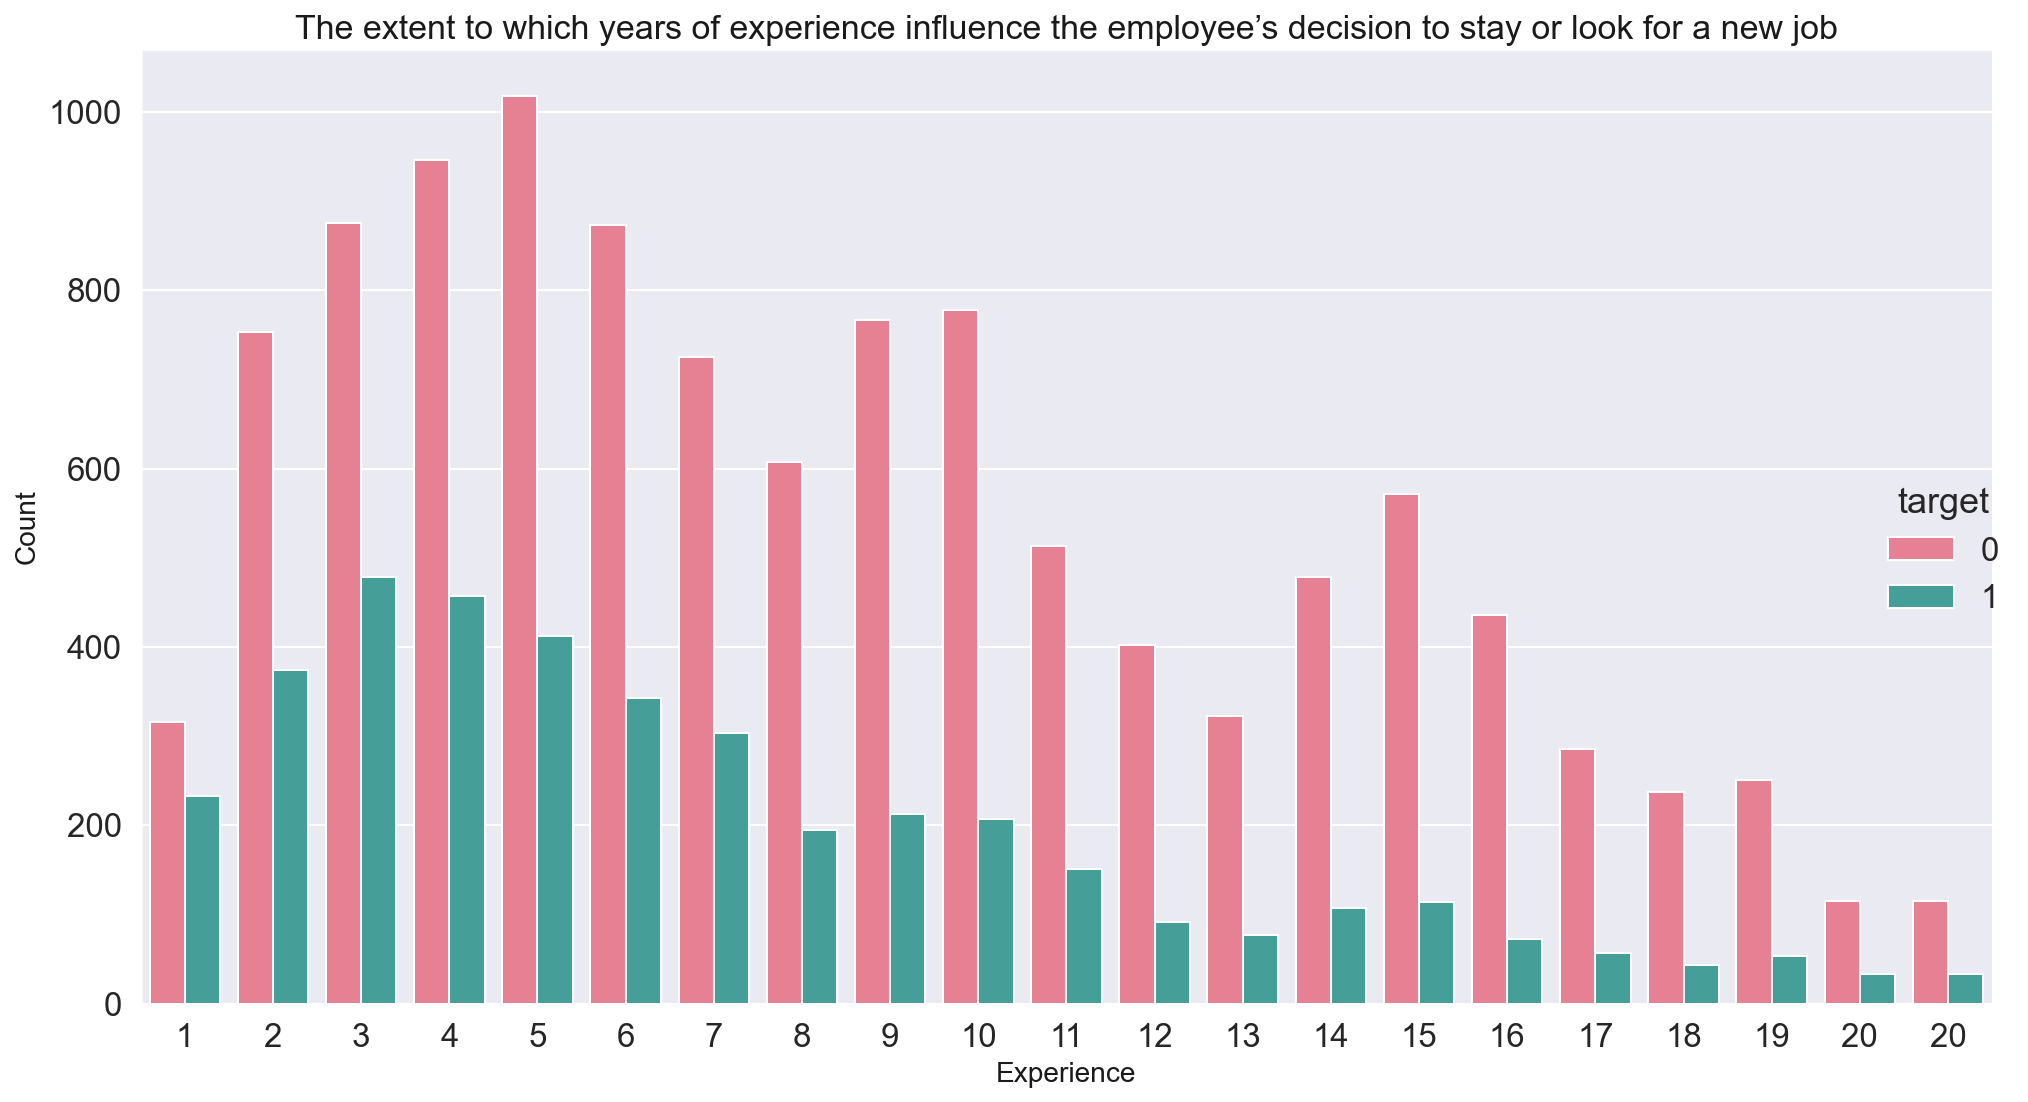

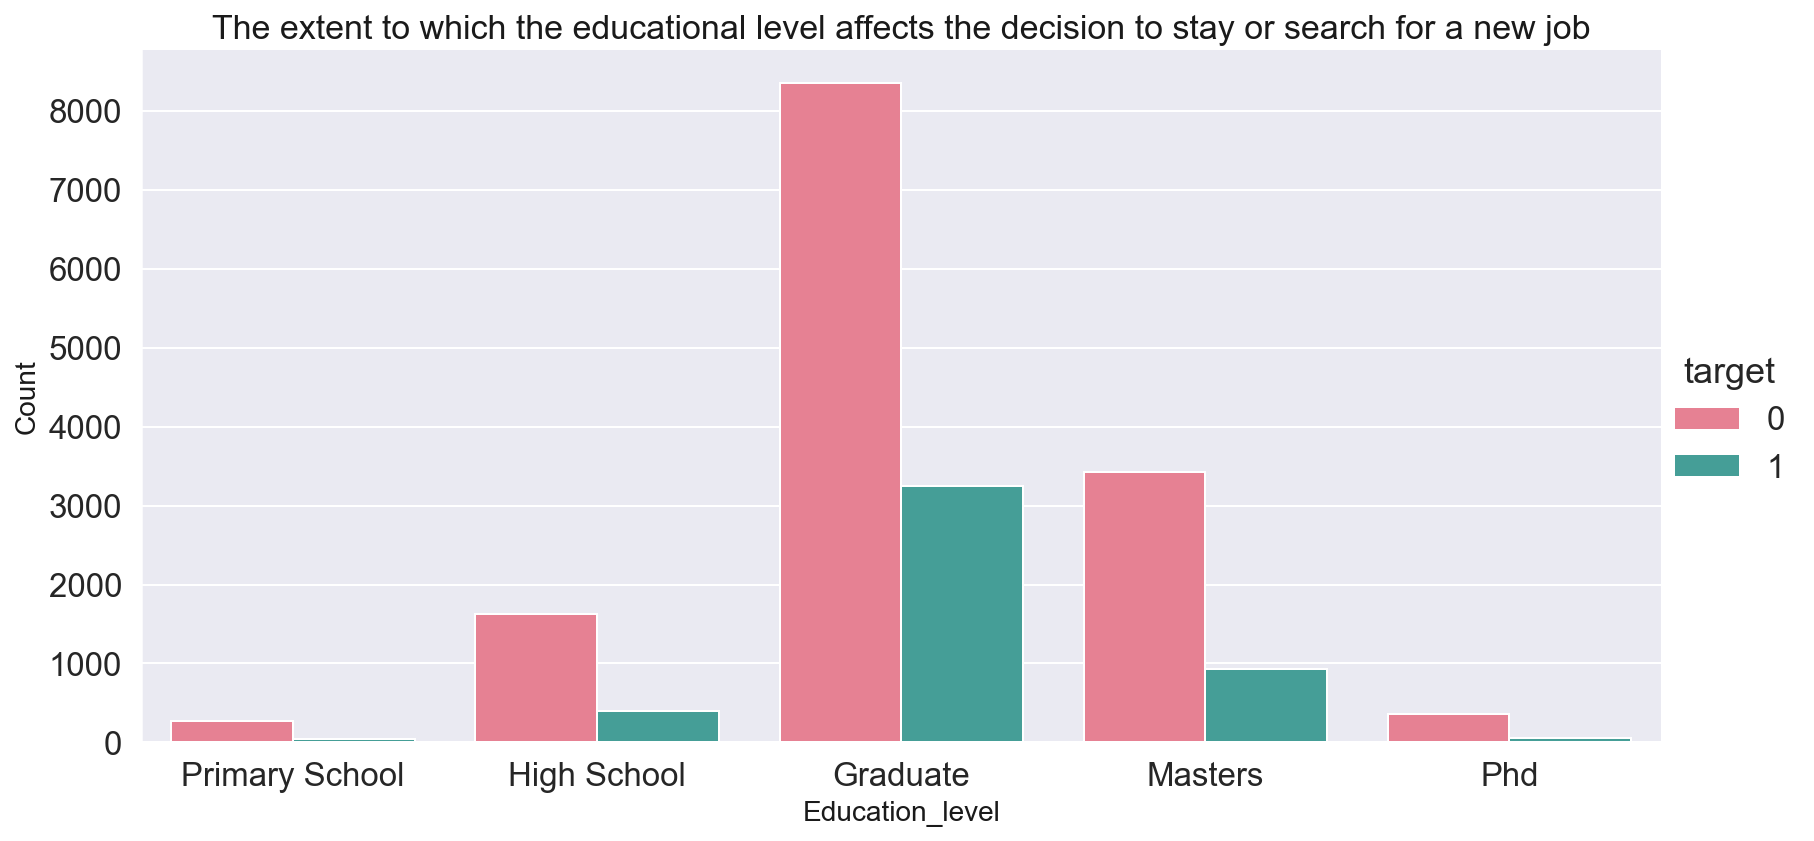

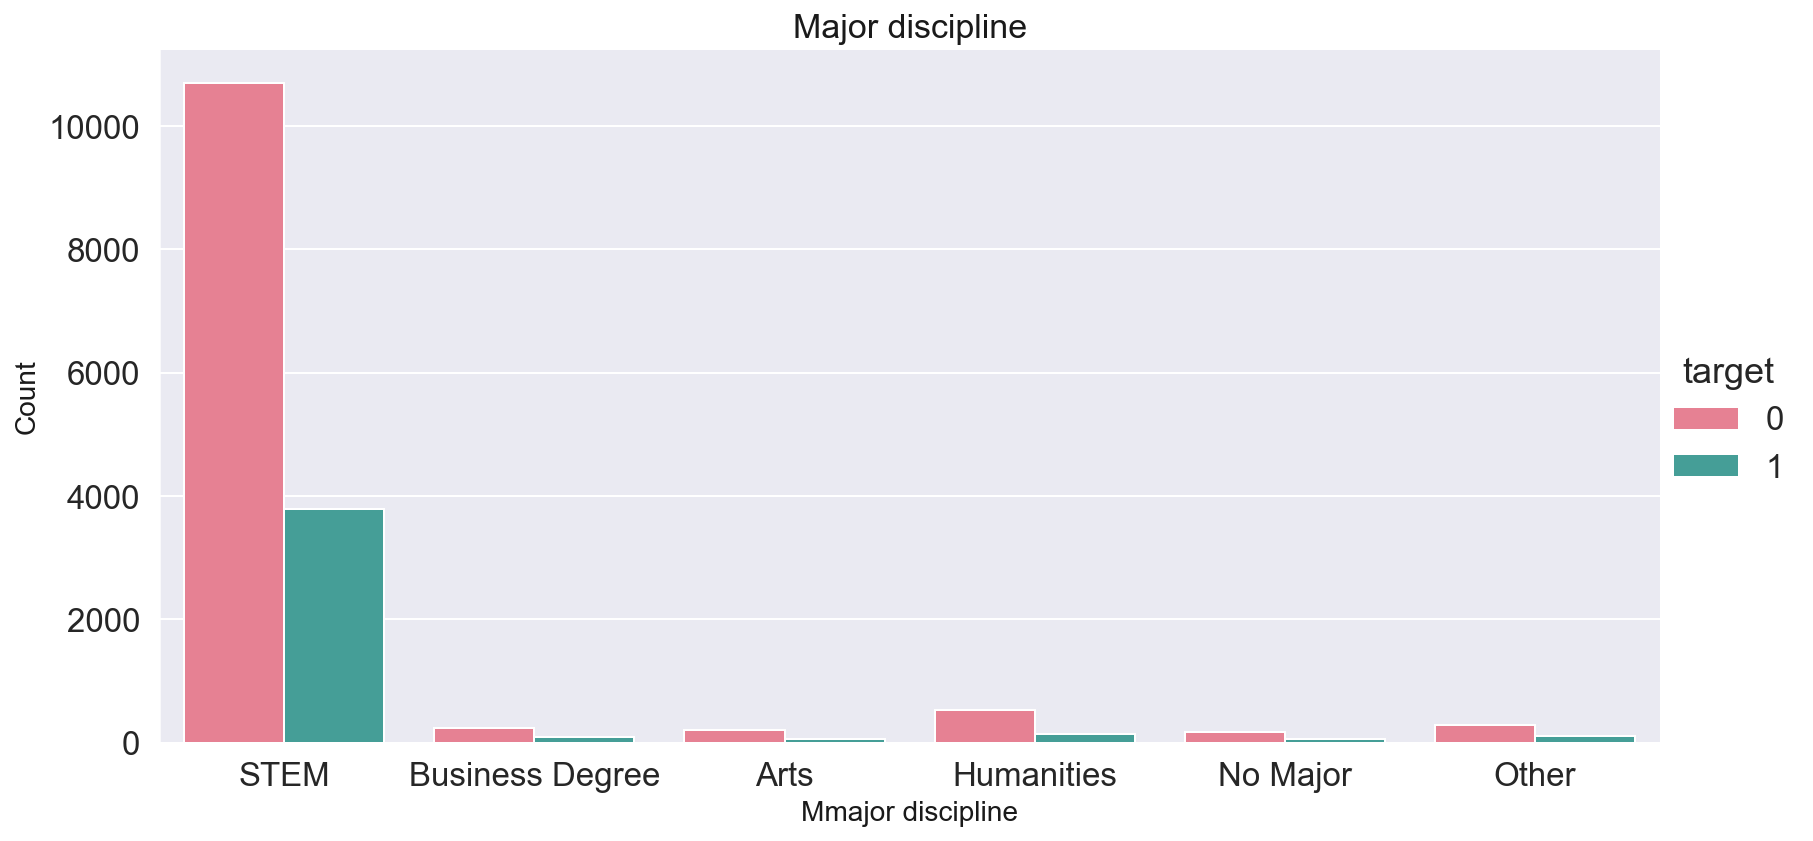

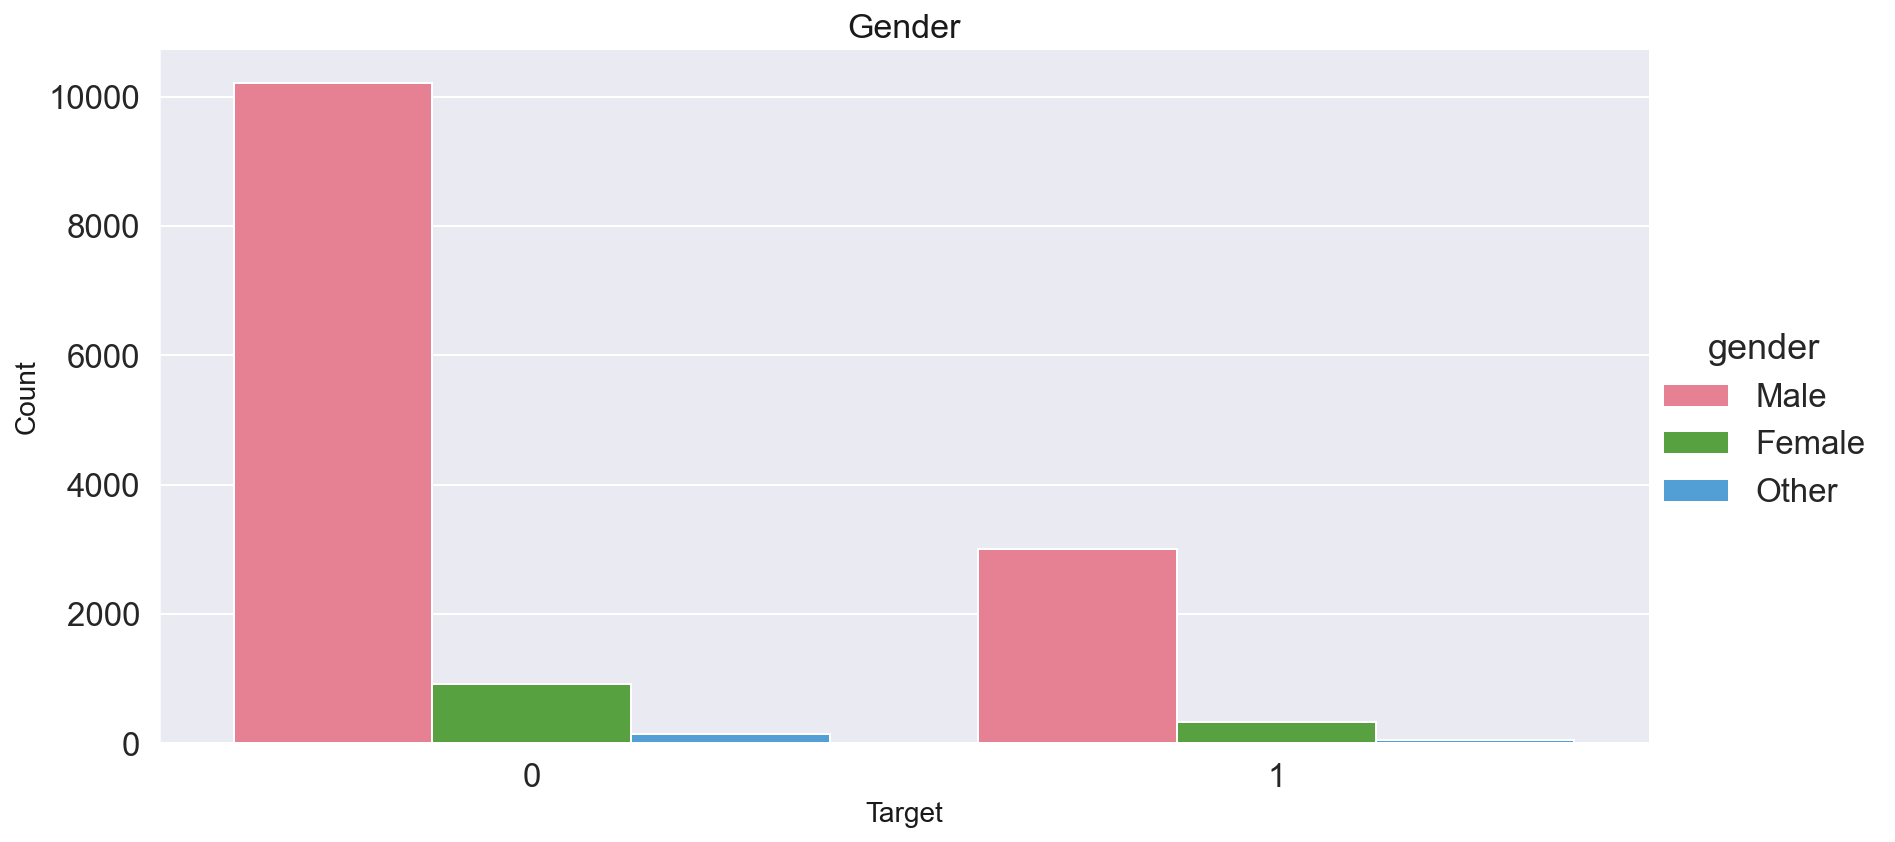

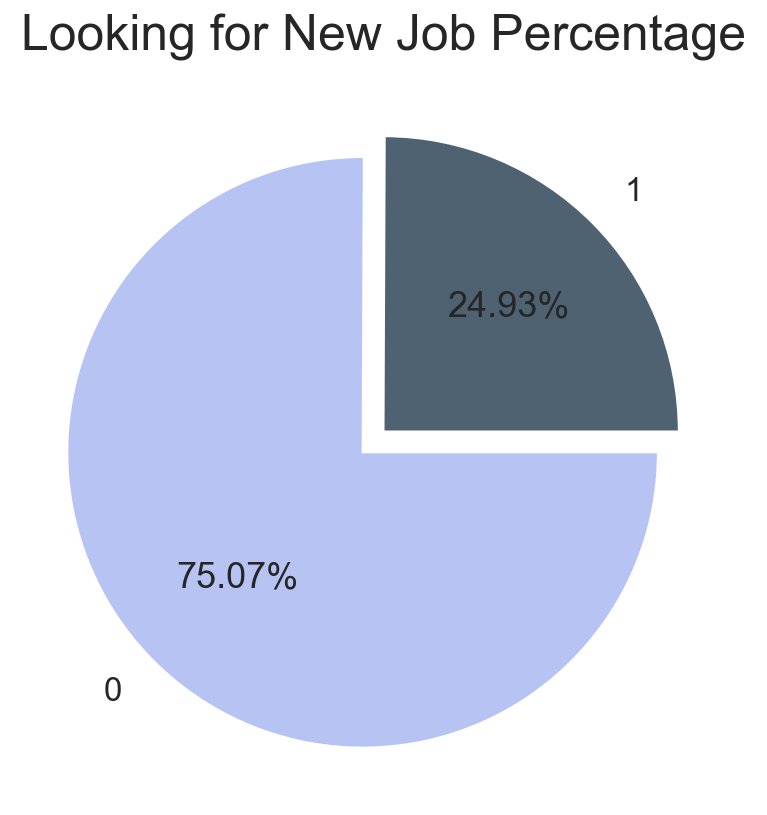

In [245]:
label_dict = {"color":"k","fontsize":14} # x, y 
title_dict = {"color":"k","fontsize":17} # title

fig= plt.figure(figsize=(15,8)).suptitle("Data Spreads",fontsize=22)

sns.catplot(x="experience", kind="count", data=df_train, height=8, aspect=10/6,
            palette="husl", hue='target',
             order= [ '1','2','3','4', '5','6','7','8','9','10', '11','12','13','14','15','16','17','18','19','20','20'] )#, bins=70, ax=ax0)
plt.title('The extent to which years of experience influence the employee’s decision to stay or look for a new job', 
              fontdict=title_dict)
plt.xlabel('Experience', fontdict=label_dict)
plt.ylabel('Count', fontdict=label_dict)
plt.tight_layout()
#####################################
sns.catplot(x="education_level", kind="count", data=df_train, height=6, aspect=2, palette= "husl",
            hue='target',order= ['Primary School','High School','Graduate','Masters','Phd']) # 
plt.title('The extent to which the educational level affects the decision to stay or search for a new job', 
              fontdict=title_dict)
plt.xlabel('Education_level', fontdict=label_dict)
plt.ylabel('Count', fontdict=label_dict);
#############################################
sns.catplot(x="major_discipline", kind="count", data=df_train, height=6, aspect=2, palette= "husl",
            hue='target')
plt.title('Major discipline', 
              fontdict=title_dict)
plt.xlabel('Mmajor discipline', fontdict=label_dict)
plt.ylabel('Count', fontdict=label_dict);
####################################################3
sns.catplot(x="target", kind="count", data=df_train, height=6, aspect=2, palette= "husl", hue="gender")
plt.title('Gender', fontdict=title_dict)
plt.xlabel('Target', fontdict=label_dict)
plt.ylabel('Count', fontdict=label_dict);
###################################################
sizes = list(df_train['target'].value_counts().sort_values().values)
labels = list(df_train['target'].value_counts().sort_values().index)

explode = [0, 0.1]

plt.figure(figsize=(6,6))

colors = ['#4F6272', '#B7C3F3']#, '#DD7596', '#8EB897']
# Use it thanks to the color argument
plt.pie(sizes, labels=labels, labeldistance=1.15,explode = explode,
        autopct=lambda p:f'{p:.2f}%', colors=colors) 
plt.title('Looking for New Job Percentage', fontsize=25)
plt.tight_layout()
plt.show()



<Figure size 1080x288 with 0 Axes>

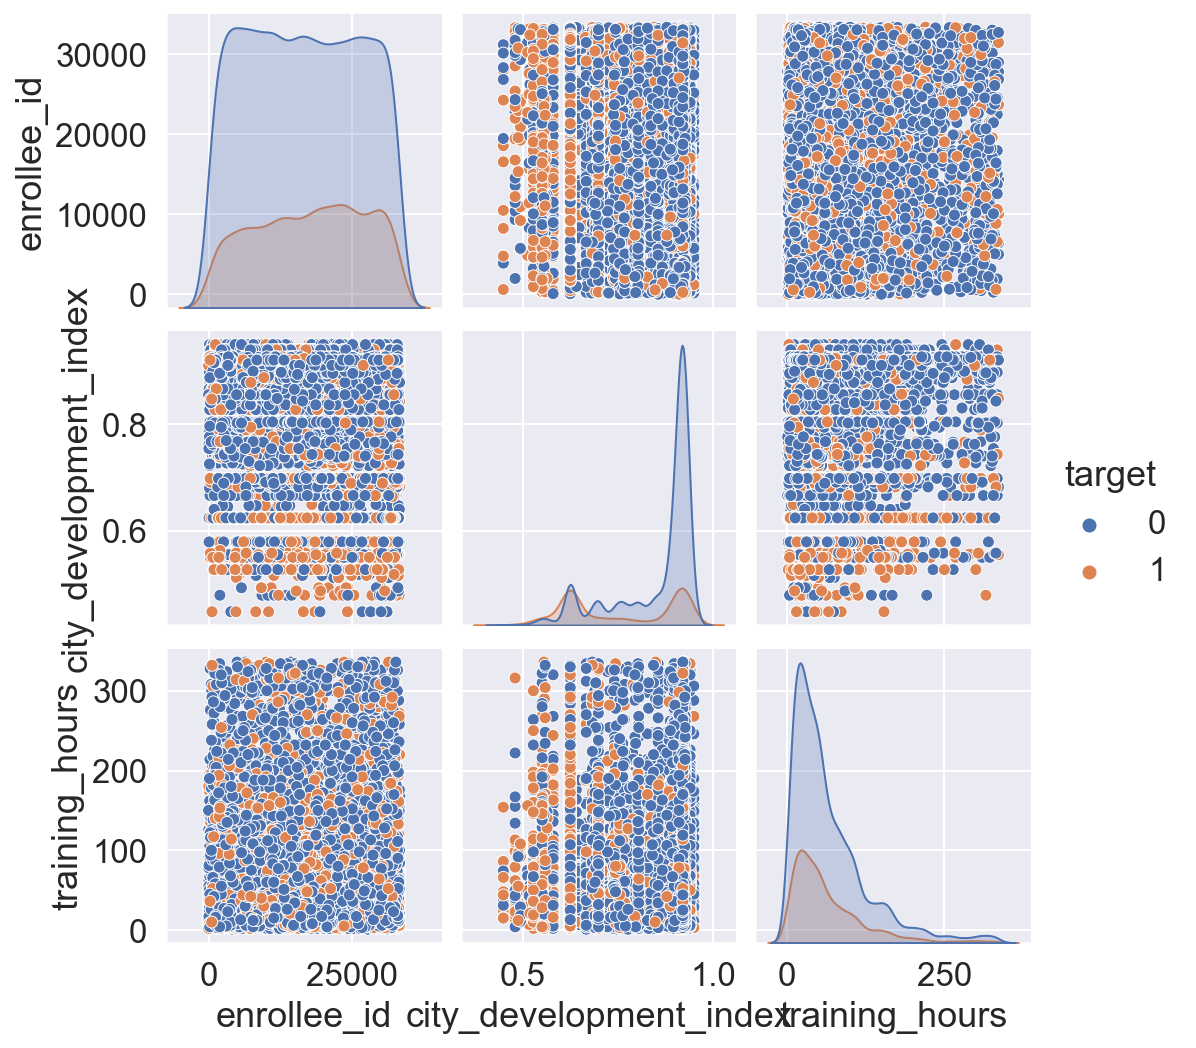

In [130]:
# Check for our data and hue by "target". Is our data linearly separable?
plt.figure(figsize=(15,4))
sns.pairplot(df_train, hue ='target')
plt.show();

In [246]:
df_train.drop(['enrollee_id','city_development_index','company_size', 'company_type'], axis = 1, inplace = True)

In [247]:
# Create x, y
X = df_train.drop('target', axis="columns")
y = df_train["target"]

In [248]:
# Biild our faeteres list for cat. & numeric.  
my_list_numeric= X.select_dtypes(include=np.number).columns
my_list_cat = X.select_dtypes(exclude=np.number).columns
print(my_list_numeric, my_list_cat)

Index(['training_hours'], dtype='object') Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'last_new_job'],
      dtype='object')


### Outliers 

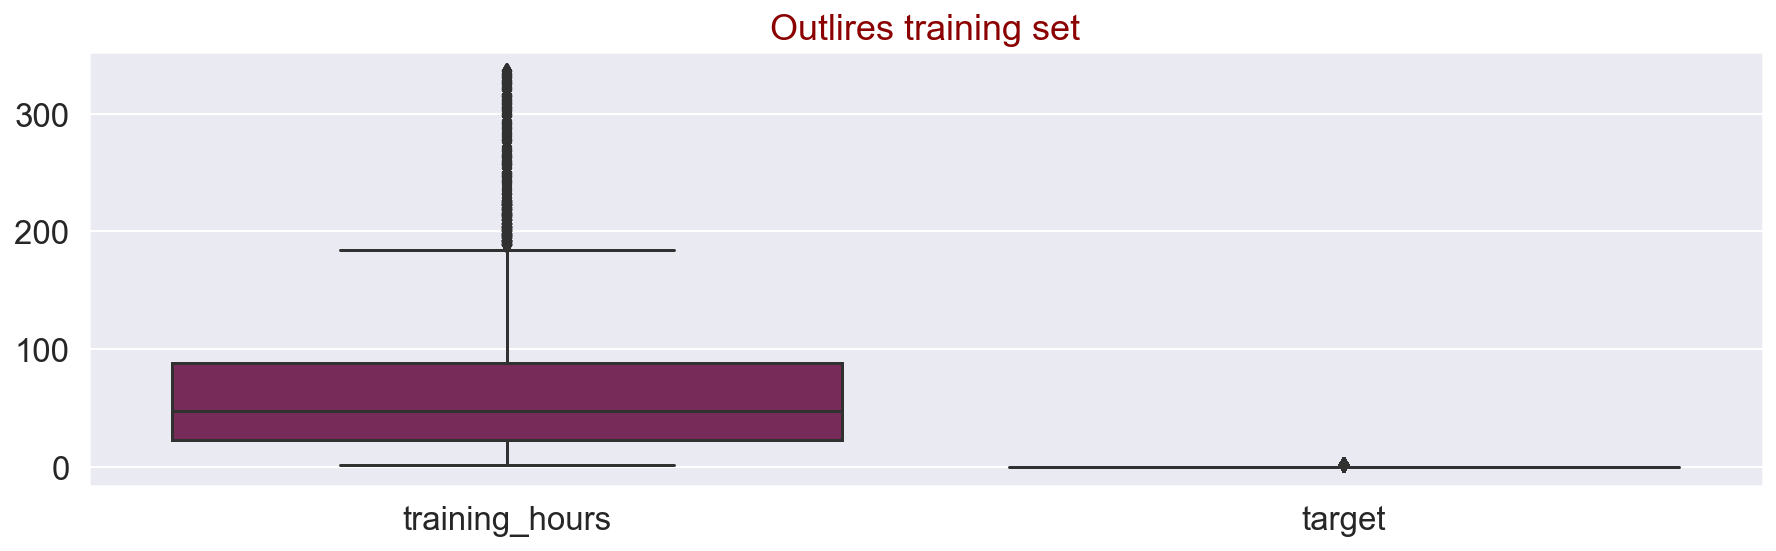

In [174]:
# Using Boxplots to visualize numeric data for check from Outlires value. 
plt.figure(figsize=(15,4))
sns.boxplot(data=df_train, palette= "rocket")
plt.title('Outlires training set', color="darkred", fontsize= 18)
plt.show()


### Dummy variabiles  

In [249]:
# Dummy variabiles and label encoder.===> Useful in that it works ignore
X = pd.get_dummies(X, drop_first=True)
X.head()

#X = pd.get_dummies(X, columns = ['city', 'gender', 'relevent_experience', 'enrolled_university','education_level',
# 'major_discipline', 'experience', 'last_new_job','training_hours'], drop_first=True )

,training_hours,city_10,city_100,city_101,city_102,city_103,city_104,city_105,city_106,city_107,...,experience_5,experience_6,experience_7,experience_8,experience_9,last_new_job_5,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4
0,36,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,83,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [250]:
df_train.city

0        103
1         40
2         21
3        115
4        162
        ... 
19153    173
19154    103
19155    103
19156     65
19157     67
Name: city, Length: 19158, dtype: object

<AxesSubplot:>

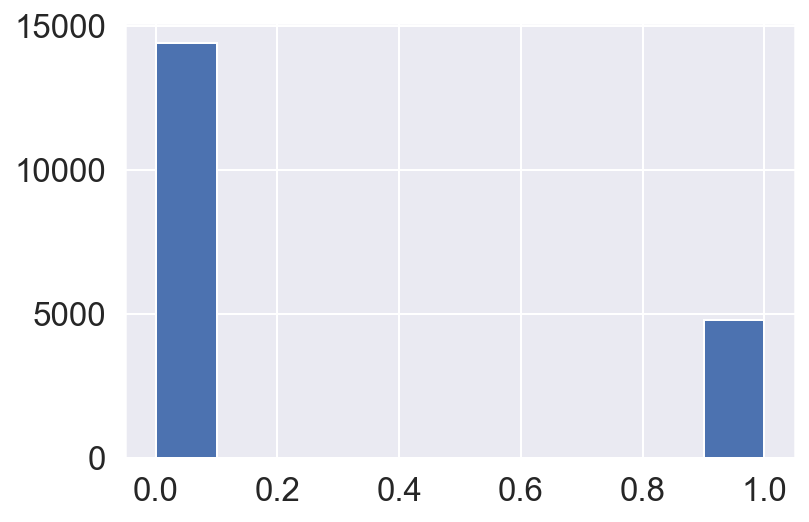

In [251]:
y.hist()

### Split into features and target -- with and without scaling

In [252]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (15326, 163)
X_test: (3832, 163)
y_train: (15326,)
y_test: (3832,)


In [253]:
#X.isna().sum()[(X.isna().sum() > 0)].index.tolist()

## Classification Algorithms 

### Logistic Regression Classifier 

In [254]:
# Here only numeric columns are taken fit fot model (Expr0)
lr_Regress_model = LogisticRegression()
lr_Regress_model.fit(X_train[my_list_numeric].fillna(0), y_train)
print(lr_Regress_model.score(X_train[my_list_numeric].fillna(0), y_train))
print(lr_Regress_model.score(X_test[my_list_numeric].fillna(0), y_test))
model_eval(lr_Regress_model, X_test[my_list_numeric].fillna(0), y_test)

0.7504241158815086
0.7515657620041754
F(1): 0.0
Precision : 0.0
Recall : 0.0
F1 score : 0.0


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [255]:
df_train.gender

0        Male
1        Male
2         NaN
3         NaN
4        Male
         ... 
19153    Male
19154    Male
19155    Male
19156    Male
19157     NaN
Name: gender, Length: 19158, dtype: object

In [256]:
X.isna().sum()[(X.isna().sum() > 0)].index.tolist()

[]

In [264]:
###### gender ###
# fill with median instead
#train_mean_gender = X_train['gender'].median()
#X_train['gender'] = X_train['gender'].fillna(train_mean_gender)
#X_test['gender'] = X_test['gender'].fillna(train_mean_gender)


In [265]:
# Expr1: with all the data (dummy included)
lr_Regress_model = LogisticRegression(max_iter=500, solver='liblinear')
lr_Regress_model.fit(X_train, y_train)
print(lr_Regress_model.score(X_train, y_train))
print(lr_Regress_model.score(X_test, y_test))
model_eval(lr_Regress_model, X_test, y_test)

0.7823959284875375
0.7729645093945721
F(1): 0.44515306122448983
Precision : 0.5665584415584416
Recall : 0.36659663865546216
F1 score : 0.44515306122448983


In [266]:
# Expr2: with scaling (standard scaler or minmax scaler)
def basic_classifiers (X_train, X_test, y_train, y_test):
    kfold = 5
    # Scaling 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)
    
# Modeling
lr_Regress_model = LogisticRegression()
lr_Regress_model.fit(X_train_std, y_train)
print(lr_Regress_model.score(X_train_std, y_train))
print(lr_Regress_model.score(X_test_std, y_test))
model_eval(lr_Regress_model, X_test_std, y_test)


0.7827874200704685
0.7732254697286013
F(1): 0.4538026398491515
Precision : 0.564945226917058
Recall : 0.3792016806722689
F1 score : 0.4538026398491515


In [267]:
# Expr2: with scaling (standard scaler or minmax scaler)
mm = MinMaxScaler()

X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)

# Modeling
lr_Regress_model = LogisticRegression(solver='liblinear')
lr_Regress_model.fit(X_train_mm, y_train)
print(lr_Regress_model.score(X_train_mm, y_train))
print(lr_Regress_model.score(X_test_mm, y_test))
model_eval(lr_Regress_model, X_test_mm, y_test)

0.782200182696072
0.7729645093945721
F(1): 0.44515306122448983
Precision : 0.5665584415584416
Recall : 0.36659663865546216
F1 score : 0.44515306122448983


In [268]:
# Expr3: with grid search
lr_Regress_model = LogisticRegression()
parms = {"penalty":['l2','l1'],"C" : np.arange(0.1,3,0.2),"fit_intercept":[True, False]}

custom_scorer = make_scorer(fbeta_score, beta=1)

gs_cv = GridSearchCV(lr_Regress_model, param_grid = parms, n_jobs=-1, cv=10, verbose=10, scoring=custom_scorer)
gs_cv.fit(X_train_std, y_train)
print(gs_cv.best_score_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1

0.5423058160114135


In [269]:
gs_cv.best_params_

{'C': 0.1, 'fit_intercept': False, 'penalty': 'l2'}

In [270]:
best_model = gs_cv.best_estimator_

In [271]:
print(best_model.score(X_train_std, y_train))
print(best_model.score(X_test_std, y_test))

0.7446169907346992
0.7296450939457203


In [272]:
model_eval(best_model, X_test_std, y_test, bta=1)

F(1): 0.5395555555555555
Precision : 0.4676425269645609
Recall : 0.6376050420168067
F1 score : 0.5395555555555555


In [275]:
lr_Regress_model = LogisticRegression(C= 0.1, fit_intercept= False, penalty= 'l2')
lr_Regress_model.fit(X_train_std, y_train)
print(lr_Regress_model.score(X_train_std, y_train))
print(lr_Regress_model.score(X_test_std, y_test))

0.7446169907346992
0.7296450939457203


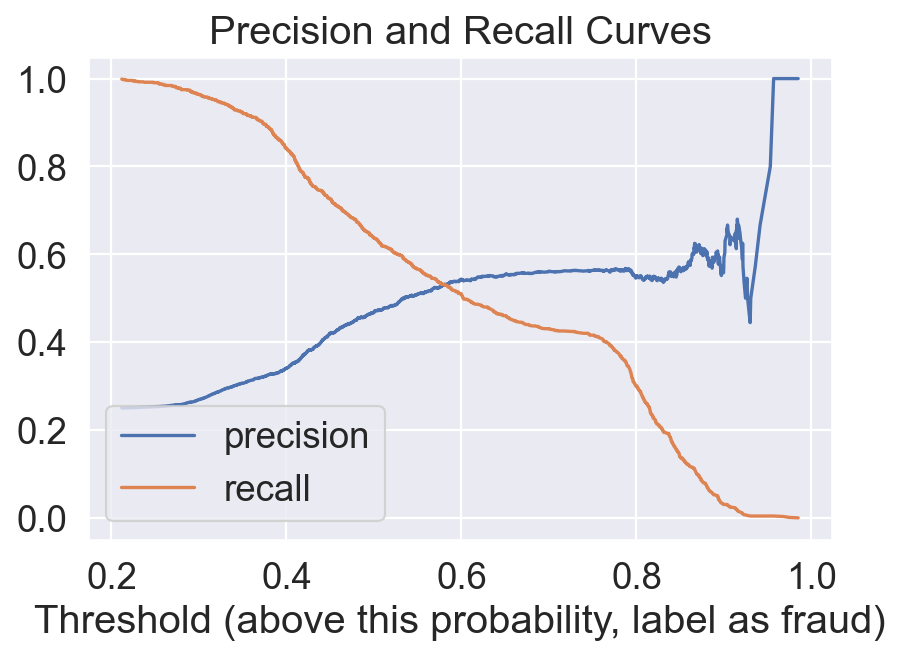

In [276]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, best_model.predict_proba(X_test_std)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [277]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(best_model,X_test_std, y_test, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [278]:
interactive(lambda threshold: make_class_report(best_model,X_test_std, y_test, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

<AxesSubplot:>

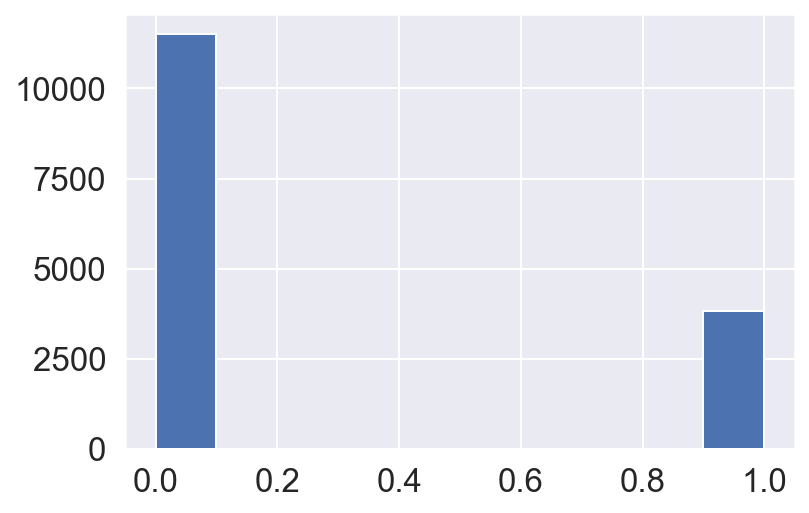

In [279]:
y_train.hist()

### Decision Tree Algorithm 

In [292]:
print(); print(BOLD + 'Decision Tree Classifier Model:' + END)
decision_tree = DecisionTreeClassifier()
dt_pred = model_metrics(decision_tree, kfold, X_train, X_test, y_train, y_test, df_train)


Decision Tree Classifier Model:
CV scores:  [0.69536856 0.68809135 0.69559543 0.69168026 0.69885808]
CV Standard Deviation:  0.0036953894752604407

CV Mean score:  0.693918736146272
Train score:    0.9942581234503458
Test score:     0.6912839248434238

Confusion Matrix: 
[[2303  577]
 [ 606  346]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      2880
           1       0.37      0.36      0.37       952

    accuracy                           0.69      3832
   macro avg       0.58      0.58      0.58      3832
weighted avg       0.69      0.69      0.69      3832



ValueError: could not convert string to float: 'Male'

In [299]:
# 2) Model your data with Decision Tree. Get the train and test scores. Is your model overfitting?
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
predict = dec_tree.predict(X_test)
print("The score for Decision Tree Classifier is:")
print("Training:", dec_tree.score(X_train, y_train))
print("Test set:", dec_tree.score(X_test, y_test))
model_eval(dec_tree, X_test, y_test)

The score for Decision Tree Classifier is:
Training: 0.9942581234503458
Test set: 0.68919624217119
F(1): 0.36749867233138606
Precision : 0.3716433941997852
Recall : 0.3634453781512605
F1 score : 0.36749867233138606


In [300]:
# standard scaler
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train_std, y_train)
print(dec_tree.score(X_train_std, y_train))
print(dec_tree.score(X_test_std, y_test))
model_eval(dec_tree, X_test_std, y_test)

0.9942581234503458
0.6847599164926931
F(1): 0.3574468085106383
Precision : 0.3620689655172414
Recall : 0.35294117647058826
F1 score : 0.3574468085106383


In [301]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('dec_tree', dec_tree)])

In [302]:
# Expr 1:for Decision Tree with grid search
dec_tree = DecisionTreeClassifier()
tree_parms = {
    'max_depth' : [3, 5, 7, 8, 11, 12],
    'min_samples_split' : [2, 3, 5, 9], 
    'criterion' :['gini', 'entropy']
}

dt_gs_cv = GridSearchCV(dec_tree, tree_parms, n_jobs=-1) # n_jobs=-1, verbose=1, cv=3
dt_gs_cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [303]:
dt_gs_cv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

In [306]:
final_dt_model = dt_gs_cv.best_estimator_ 

In [314]:
# == final_dt_model = dt_gs_cv.best_estimator_ 
dec_tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 3, min_samples_split = 2)
dec_tree.fit(X_train_std, y_train)
print(dec_tree.score(X_train_std, y_train))
print(dec_tree.score(X_test_std, y_test))
model_eval(dec_tree, X_test_std, y_test)

0.7806342163643482
0.7703549060542797
F(1): 0.4366197183098592
Precision : 0.559016393442623
Recall : 0.3581932773109244
F1 score : 0.4366197183098592


In [315]:
y_predict = dt_gs_cv.predict(X_test) # dt_gs_cv.predict(x_test)
accuracy_score(y_test, y_predict)

0.7703549060542797

In [316]:
model_eval(final_dt_model, X_test_std, y_test, bta=1)

F(1): 0.5395555555555555
Precision : 0.4676425269645609
Recall : 0.6376050420168067
F1 score : 0.5395555555555555


### Random Forest Algorithm 

In [318]:
RFC =RandomForestClassifier(random_state=42)
RFC.fit(X_train,y_train)
#RFC_predict = RFC.predict(x_test)
print("The score for Random Forest Classifier is:")
print("Training: {:6.2f}%".format(100*RFC.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*RFC.score(X_test, y_test)))
model_eval(RFC, X_test, y_test)

The score for Random Forest Classifier is:
Training:  99.40%
Test set:  74.92%
F(1): 0.39445494643982354
Precision : 0.49291338582677163
Recall : 0.328781512605042
F1 score : 0.39445494643982354


In [321]:
# standard scaler
RFC =RandomForestClassifier(random_state=42)
RFC.fit(X_train_std, y_train)
print("The score for Random Forest Classifier wthi standard scaler:")
print("Training: {:6.2f}%".format(100*RFC.score(X_train_std, y_train)))
print("Test set: {:6.2f}%".format(100*RFC.score(X_test_std, y_test)))
model_eval(RFC, X_test_std, y_test)

The score for Random Forest Classifier wthi standard scaler:
Training:  99.40%
Test set:  74.90%
F(1): 0.39344262295081966
Precision : 0.4921135646687697
Recall : 0.3277310924369748
F1 score : 0.39344262295081966


In [325]:
# Random Forest with Grid Search
RFC =RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [10, 20, 40, 50, 70],
    'max_depth':[3, 5, 7, 8, 11, 12], 
    'criterion' : ['gini', 'entropy'], 
    'min_samples_split' : [2, 3, 5, 9], 
    'max_features' : ['auto', 'sqrt', 'log2']
}

rfc_gscv = GridSearchCV(estimator= RFC, param_grid = param_grid, cv=5, n_jobs=-1) # verbose=True, n_jobs=-1, verbose=1, cv=3
rfc_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [338]:
rfc_gscv.best_params_


{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 70}

In [339]:
best_RFC=rfc_gscv.best_estimator_ 

In [333]:
RFC = RandomForestClassifier(criterion = 'entropy', max_depth= 12, max_features = 'auto', min_samples_split = 5,
                             n_estimators = 70)

RFC.fit(X_train_std, y_train)
print(RFC.score(X_train_std, y_train))
print(RFC.score(X_test_std, y_test))
model_eval(RFC, X_test_std, y_test)

0.7833746574448649
0.7609603340292276
F(1): 0.21305841924398627
Precision : 0.5849056603773585
Recall : 0.13025210084033614
F1 score : 0.21305841924398627


In [334]:
y_predict = rfc_gscv.predict(X_test) # dt_gs_cv.predict(x_test)
accuracy_score(y_test, y_predict)

0.7580897703549061

In [340]:
model_eval(best_RFC, X_test_std, y_test, bta=1)

F(1): 0.36758321273516636
Precision : 0.5906976744186047
Recall : 0.2668067226890756
F1 score : 0.36758321273516636


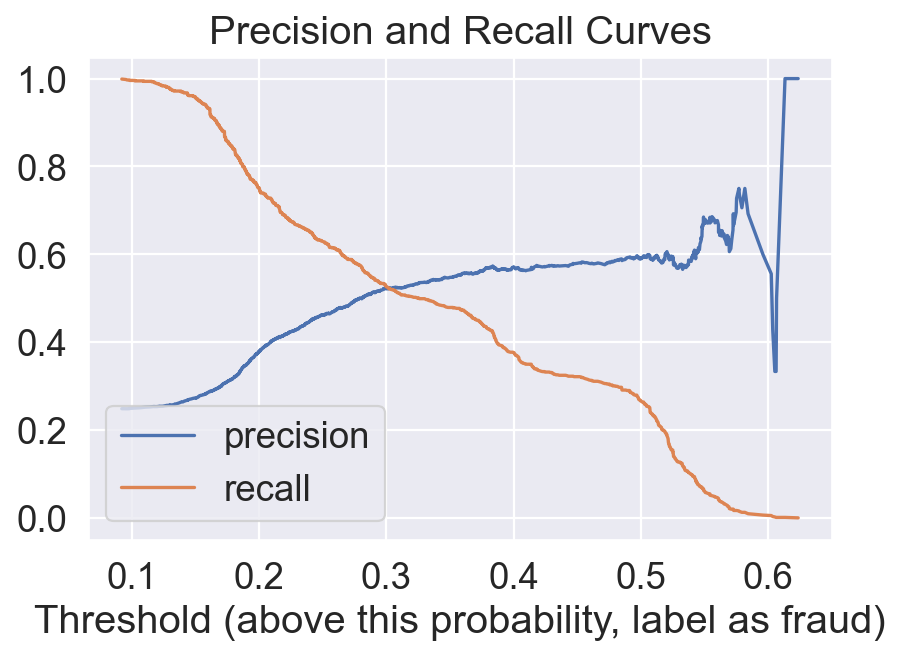

In [341]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, best_RFC.predict_proba(X_test_std)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [342]:
interactive(lambda threshold: make_confusion_matrix(best_RFC,X_test_std, y_test, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [343]:
interactive(lambda threshold: make_class_report(best_RFC,X_test_std, y_test, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

<AxesSubplot:>

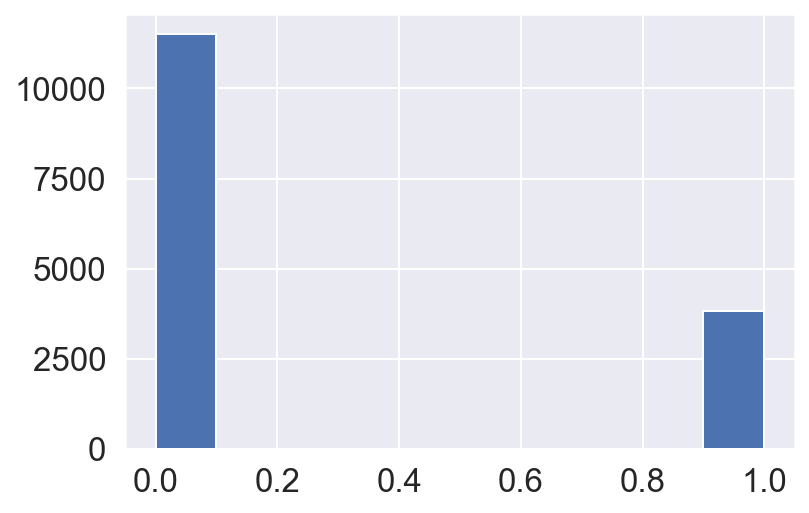

In [344]:
y_train.hist()

### K-Nearest Neighbor(KNN) Algorithm   

In [348]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("The score for kNN is:")
print("Training: {:6.2f}%".format(100*knn.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test, y_test)))
model_eval(knn, X_test, y_test)
# print("accuracy:", metrics.accuracy_score(y_test, y_pred))

The score for kNN is:
Training:  80.91%
Test set:  73.07%
F(1): 0.32987012987012987
Precision : 0.43197278911564624
Recall : 0.2668067226890756
F1 score : 0.32987012987012987


In [350]:
# standard scaler
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("The score for kNN is wthi standard scaler:")
print("Training: {:6.2f}%".format(100*knn.score(X_train_std, y_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test_std, y_test)))
model_eval(knn, X_test, y_test)

The score for kNN is wthi standard scaler:
Training:  74.69%
Test set:  74.45%
F(1): 0.32987012987012987
Precision : 0.43197278911564624
Recall : 0.2668067226890756
F1 score : 0.32987012987012987


In [351]:
# KNN with Grid Search
knn = KNeighborsClassifier(n_neighbors=5)

parameters_KNN = {
    'n_neighbors':[1,10,1],
    'leaf_size': [20,40,1],
    'p': [1,2], 'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'chebyshev']
}
grid_search_KNN = GridSearchCV( estimator= knn, param_grid=parameters_KNN, n_jobs = -1, cv = 5) #scoring='accuracy'
grid_search_KNN.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'leaf_size': [20, 40, 1],
                         'metric': ['minkowski', 'chebyshev'],
                         'n_neighbors': [1, 10, 1], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [352]:
grid_search_KNN.best_params_

{'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 10,
 'p': 1,
 'weights': 'uniform'}

In [354]:
best_KNN= grid_search_KNN.best_estimator_ 

In [355]:
knn = KNeighborsClassifier(leaf_size = 1,  metric = 'minkowski', n_neighbors= 10, p= 1, weights = 'uniform')
knn.fit(X_train_std, y_train)
print(knn.score(X_train_std, y_train))
print(knn.score(X_test_std, y_test))
model_eval(knn, X_test_std, y_test)

0.7969463656531385
0.7578288100208769
F(1): 0.36088154269972456
Precision : 0.524
Recall : 0.27521008403361347
F1 score : 0.36088154269972456


In [356]:
y_predict = grid_search_KNN.predict(X_test) # dt_gs_cv.predict(x_test)
accuracy_score(y_test, y_predict)

0.7580897703549061

In [358]:
model_eval(best_KNN, X_test_std, y_test, bta=1)

F(1): 0.35760634462869506
Precision : 0.5701149425287356
Recall : 0.2605042016806723
F1 score : 0.35760634462869506


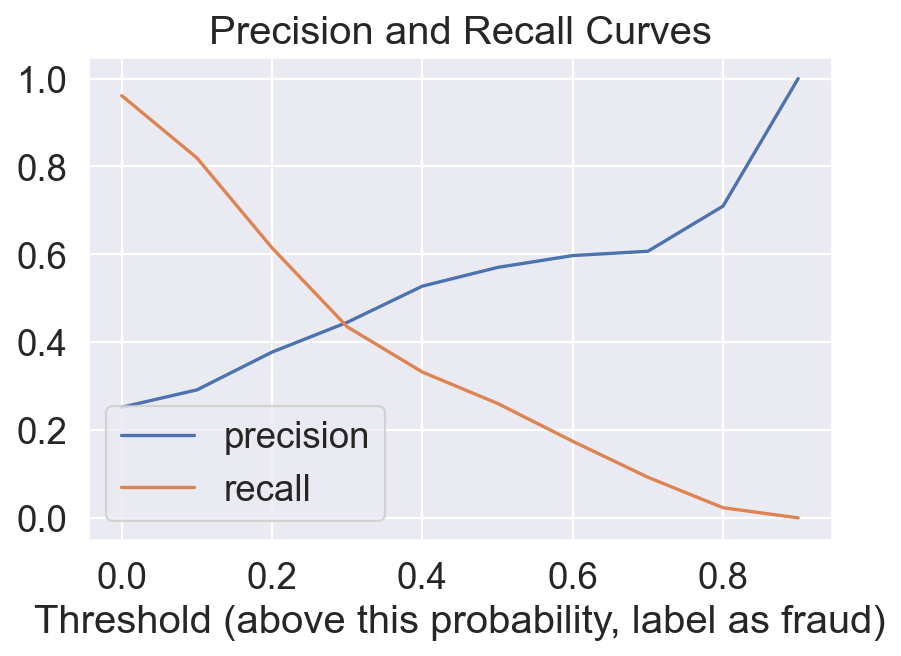

In [359]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, best_KNN.predict_proba(X_test_std)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [360]:
interactive(lambda threshold: make_confusion_matrix(best_KNN,X_test_std, y_test, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [361]:
interactive(lambda threshold: make_class_report(best_KNN,X_test_std, y_test, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

### XGboost Algorithm

In [375]:
gbm = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=4,
                       objective='binary:logistic',
                       learning_rate=.05,
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
)

eval_set=[(x_train,y_train),(x_test,y_test)] #tracking train/validation error as we go
fit_model = gbm.fit(x_train,y_train, 
                    eval_metric='error',
                    eval_set=eval_set,
                    early_stopping_rounds=20,
                    verbose=True #gives output log as below
                   )

NameError: name 'x_train' is not defined

In [ ]:
accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 